# Star Wars Survey
Prior to the premier of Star Wars: The Force Awakens, [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) released a SurveyMonkey questionnaire to find out what peoples favorite Star Wars films are. Particularly, they wanted to know if people realized `Star Wars: Episode V The Empire Strikes Back` is the best of the movies. We will be using their dataset in this project.

# 1.0 Reading and checking the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

In [2]:
## Checking the dataset
print(star_wars.shape)
print('')
print(star_wars.columns)
print('')
star_wars.head(10)

(1186, 38)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar wi

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

# 2.0 Cleaning the dataset

Some of the columns contain the answers `Yes` and `No`. We will convert these to boolean type to make them easier to deal with.

In [3]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?',
        'Do you consider yourself to be a fan of the Expanded Universe?', 'Do you consider yourself to be a fan of the Star Trek franchise?',
        'Are you familiar with the Expanded Universe?']

for c in cols:
        star_wars[c] = star_wars[c].map({'Yes': True, 'No': False})


star_wars[cols].head(10)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Are you familiar with the Expanded Universe?
0,True,True,False,False,True
1,False,NaN,NaN,True,NaN
2,True,False,NaN,False,False
3,True,True,NaN,True,False
4,True,True,False,False,True
5,True,True,False,True,True
6,True,True,False,False,True
7,True,True,NaN,True,False
8,True,True,NaN,False,False
9,True,False,NaN,False,False


There are several columns that are responses in form of checkboxes, where respondent checked of wether they had seen a particular Star Wars movie. If they checked 'yes' the value in the column is the name of that movie. If they didn't check it the value is set to `NaN`.

These are the columns in question:
- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` — whether the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` — whether the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` — whether the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` — whether the respondent saw Star Wars: Episode VI Return of the Jedi.

We will rename the columns and change the values to Boolean type.

In [4]:
map_dict = {'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True,
            'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True,
            'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True, np.NaN: False
            }
rename_dict1 = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_e1',
                'Unnamed: 4': 'seen_e2', 'Unnamed: 5': 'seen_e3', 'Unnamed: 6': 'seen_e4', 'Unnamed: 7': 'seen_e5', 'Unnamed: 8': 'seen_e6'
                }

#remapping values
for n in star_wars.columns[3:9]:
    star_wars[n] = star_wars[n].map(map_dict)

#renaming columns
star_wars = star_wars.rename(columns=rename_dict1)

star_wars[star_wars.columns[3:9]].head(10)


,seen_e1,seen_e2,seen_e3,seen_e4,seen_e5,seen_e6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,False,True,False,False,False,False


Six of the columns contains respondents rankings of the various Star Wars films. The columns are:
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - Rating given to Star Wars: Episode I The Phantom Menac`
- `Unnamed: 10` — Rating given to Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` — Rating given to Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` — Rating given to Star Wars: Episode IV A New Hope
- `Unnamed: 13` — Rating given to Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` — Rating given to Star Wars: Episode VI Return of the Jedi

The possible values in the columns are: `1`, `2`, `3`, `4`, `5`, `6` or `NaN`. Where `1` is the highest rating and `6` the worst.
We will rename the columns and convert them to numeric type.

In [5]:
# rename dictionary
rename_dict2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rating_e1',
                'Unnamed: 10': 'rating_e2', 'Unnamed: 11': 'rating_e3', 'Unnamed: 12': 'rating_e4', 'Unnamed: 13': 'rating_e5', 'Unnamed: 14': 'rating_e6'
                }

# converting to numeric type
star_wars[star_wars.columns[9:15]
          ] = star_wars[star_wars.columns[9:15]].astype(float)

# renaming
star_wars = star_wars.rename(columns=rename_dict2)

star_wars[star_wars.columns[9:15]].head()


,rating_e1,rating_e2,rating_e3,rating_e4,rating_e5,rating_e6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


# 2.0 Analyzing the data

## 2.1 Ratings & number of ratings
Let's find out what the most popular movie is

In [6]:
#mean ratings for the movies. Where `1` is the highest possible score and `6` is the lowest.
means = star_wars[star_wars.columns[9:15]].mean()

C:\Users\Mats\AppData\Local\Temp\ipykernel_27440\1596720260.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


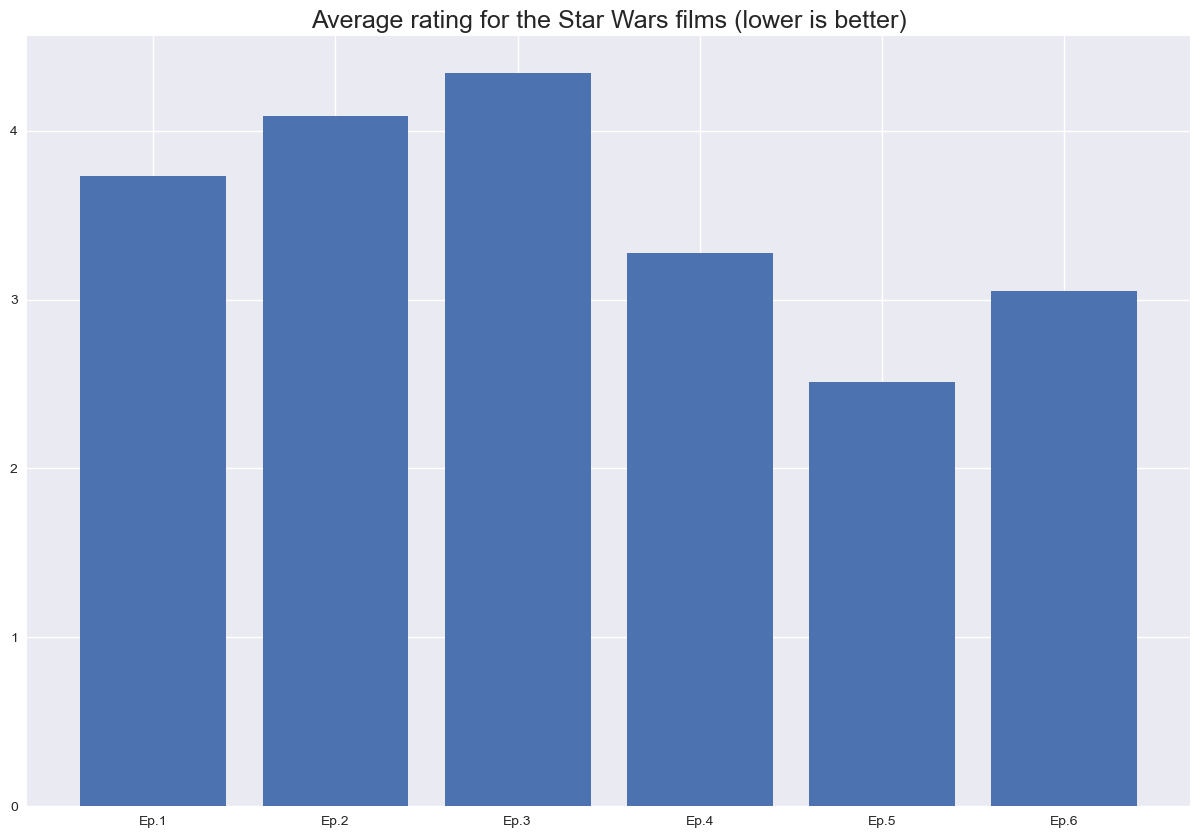

In [7]:
labels = ['Ep.1','Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6']

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(15,10))
ax.bar(x = labels, height = means)
ax.set_title('Average rating for the Star Wars films (lower is better)', fontsize=18)

plt.show()

Given the reputation of the movies this ranking is not surprising. General opinion seems to be that the original trilogy (Ep.4-6) is superior to the prequel trilogy (Ep.1-3). This is reflected in the ranking.

Next, we will check how many of the respondents have seen the different movies

C:\Users\Mats\AppData\Local\Temp\ipykernel_27440\1745004980.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


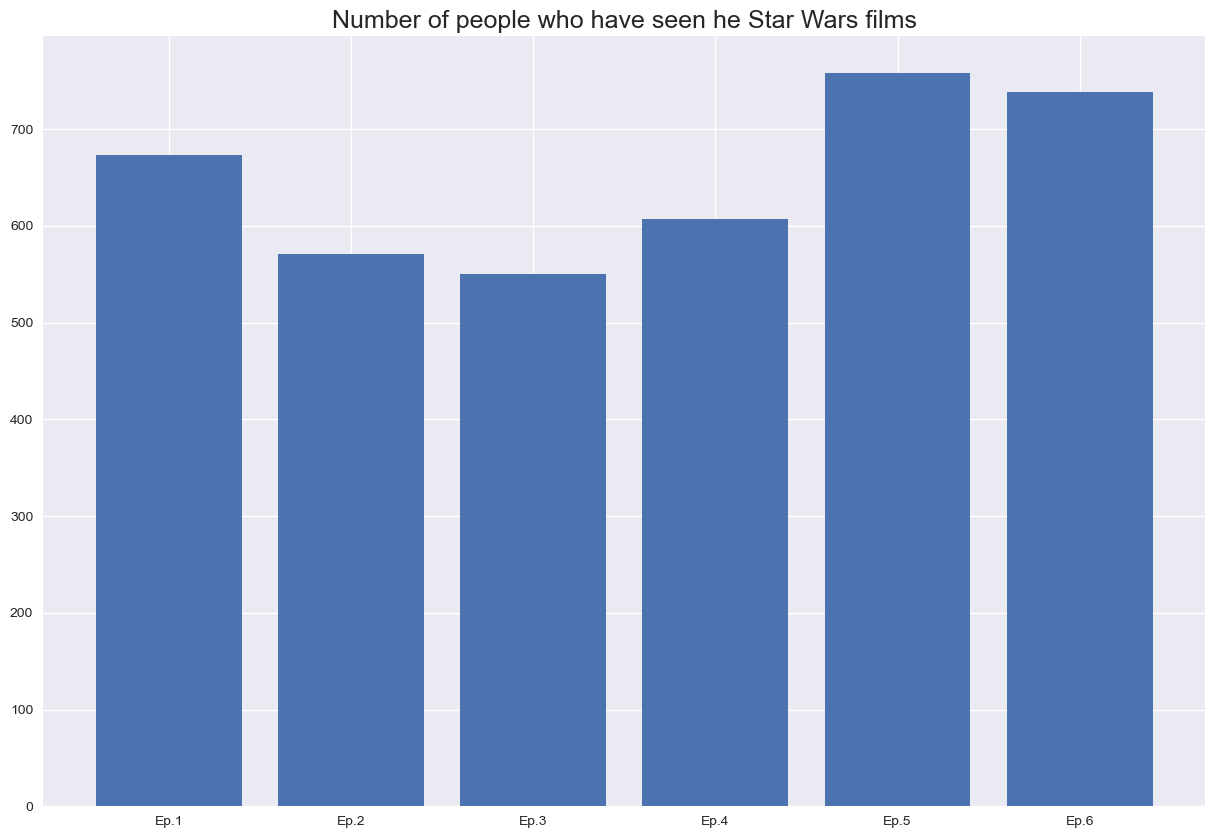

In [8]:
sums = star_wars[star_wars.columns[3:9]].sum()

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(15,10))
ax.bar(x = labels, height = sums)
ax.set_title('Number of people who have seen he Star Wars films', fontsize=18)

plt.show()

Overall, more people have seen the original trilogy. Viewership for the prequel trilogy drops noticeably after the first film, reverse of the trend for the original trilogy.

## 2.2 Ratings & Gender
Is there any significant difference in the number of respondents and ratings between the genders?

In [9]:
#Filtering dataset based on gender and creating sums and means
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

f_sum = female[female.columns[3:9]].sum()
f_mean = female[female.columns[9:15]].mean()
m_sum = male[male.columns[3:9]].sum()
m_mean = male[male.columns[9:15]].mean()


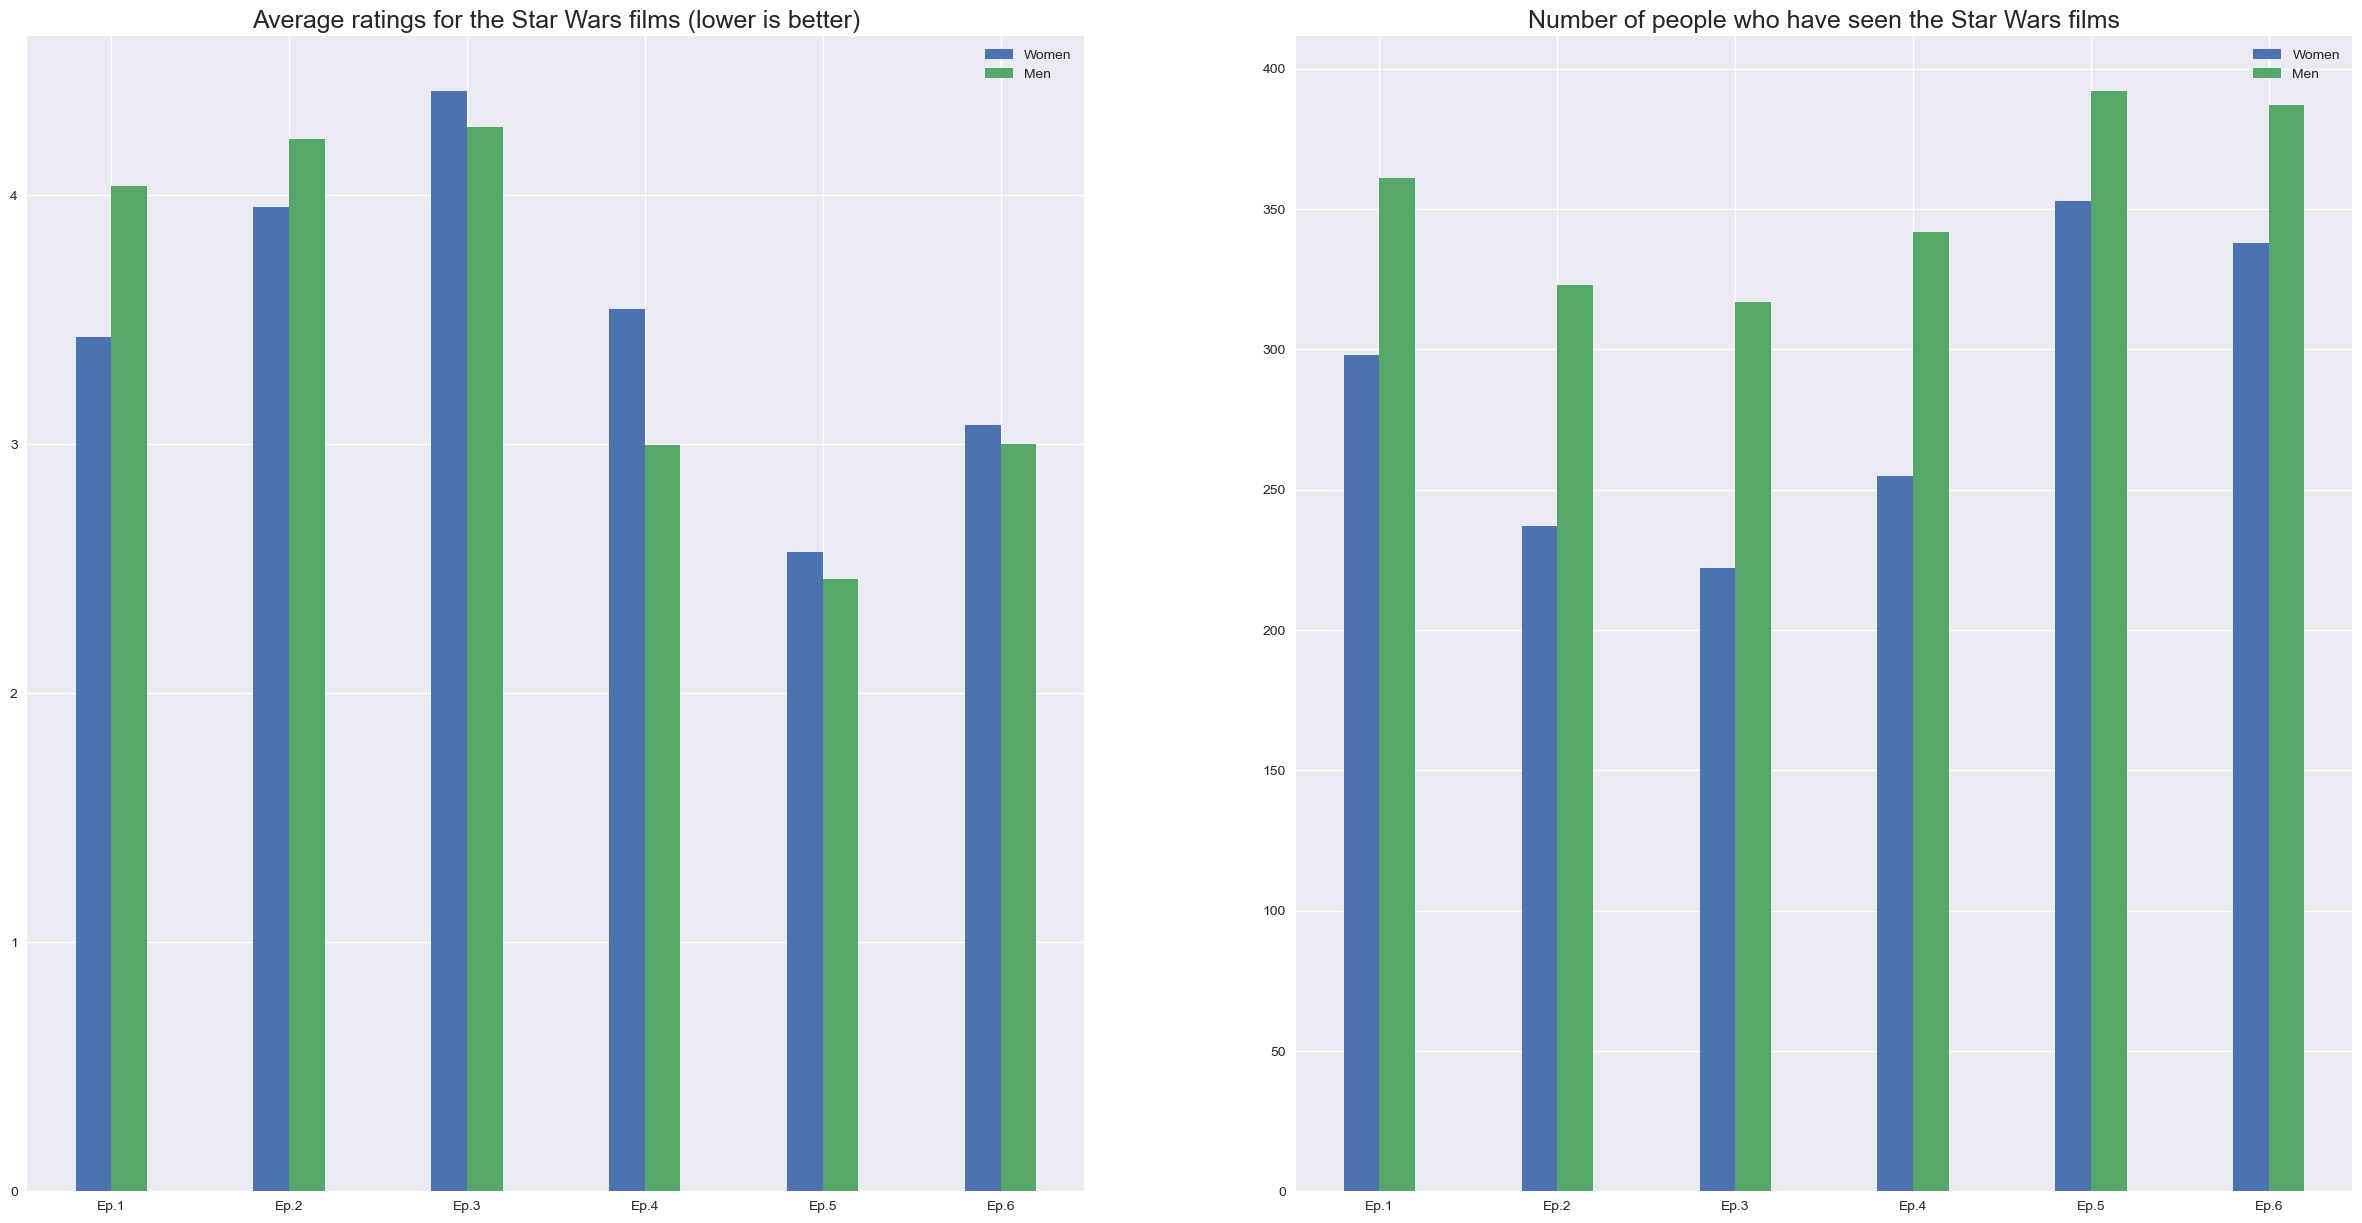

In [10]:
width = 0.20 #width of the bars
lab_len = np.arange(len(labels)) #location of the labels

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(30,15))
ax1.bar(lab_len - width/2, height = f_mean, width=width, label = 'Women')
ax1.bar(lab_len + width/2, height = m_mean, width=width, label = 'Men')
ax2.bar(lab_len - width/2, height = f_sum, width=width, label = 'Women')
ax2.bar(lab_len + width/2, height = m_sum, width=width, label = 'Men')
ax1.set_title('Average ratings for the Star Wars films (lower is better)', fontsize=18)
ax2.set_title('Number of people who have seen the Star Wars films', fontsize=18)
ax1.set_xticks(lab_len, labels), ax2.set_xticks(lab_len, labels)
ax1.legend(), ax2.legend()
plt.show()

For every movie there are more men than women who have watched them. Men rate the original trilogy slightly more favorably than women and rate the prequel trilogy *less* favorably.

The most watched and best review filmed is *Star Wars: Episode V The Empire Strikes Back* for both men and women.

## 2.3 Ratings by fan-base
The dataset contains the following two columns:
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `True` or `False`

Let's compare Star Wars fans with people who don't consider themselves fans.

In [11]:
#Filtering dataset based on gender and creating sums and means
sw_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
sw_notfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

sw_fans_sum = sw_fans[sw_fans.columns[3:9]].sum()
sw_fans_mean = sw_fans[sw_fans.columns[9:15]].mean()
sw_notfans_sum = sw_notfans[sw_notfans.columns[3:9]].sum()
sw_notfans_mean = sw_notfans[sw_notfans.columns[9:15]].mean()

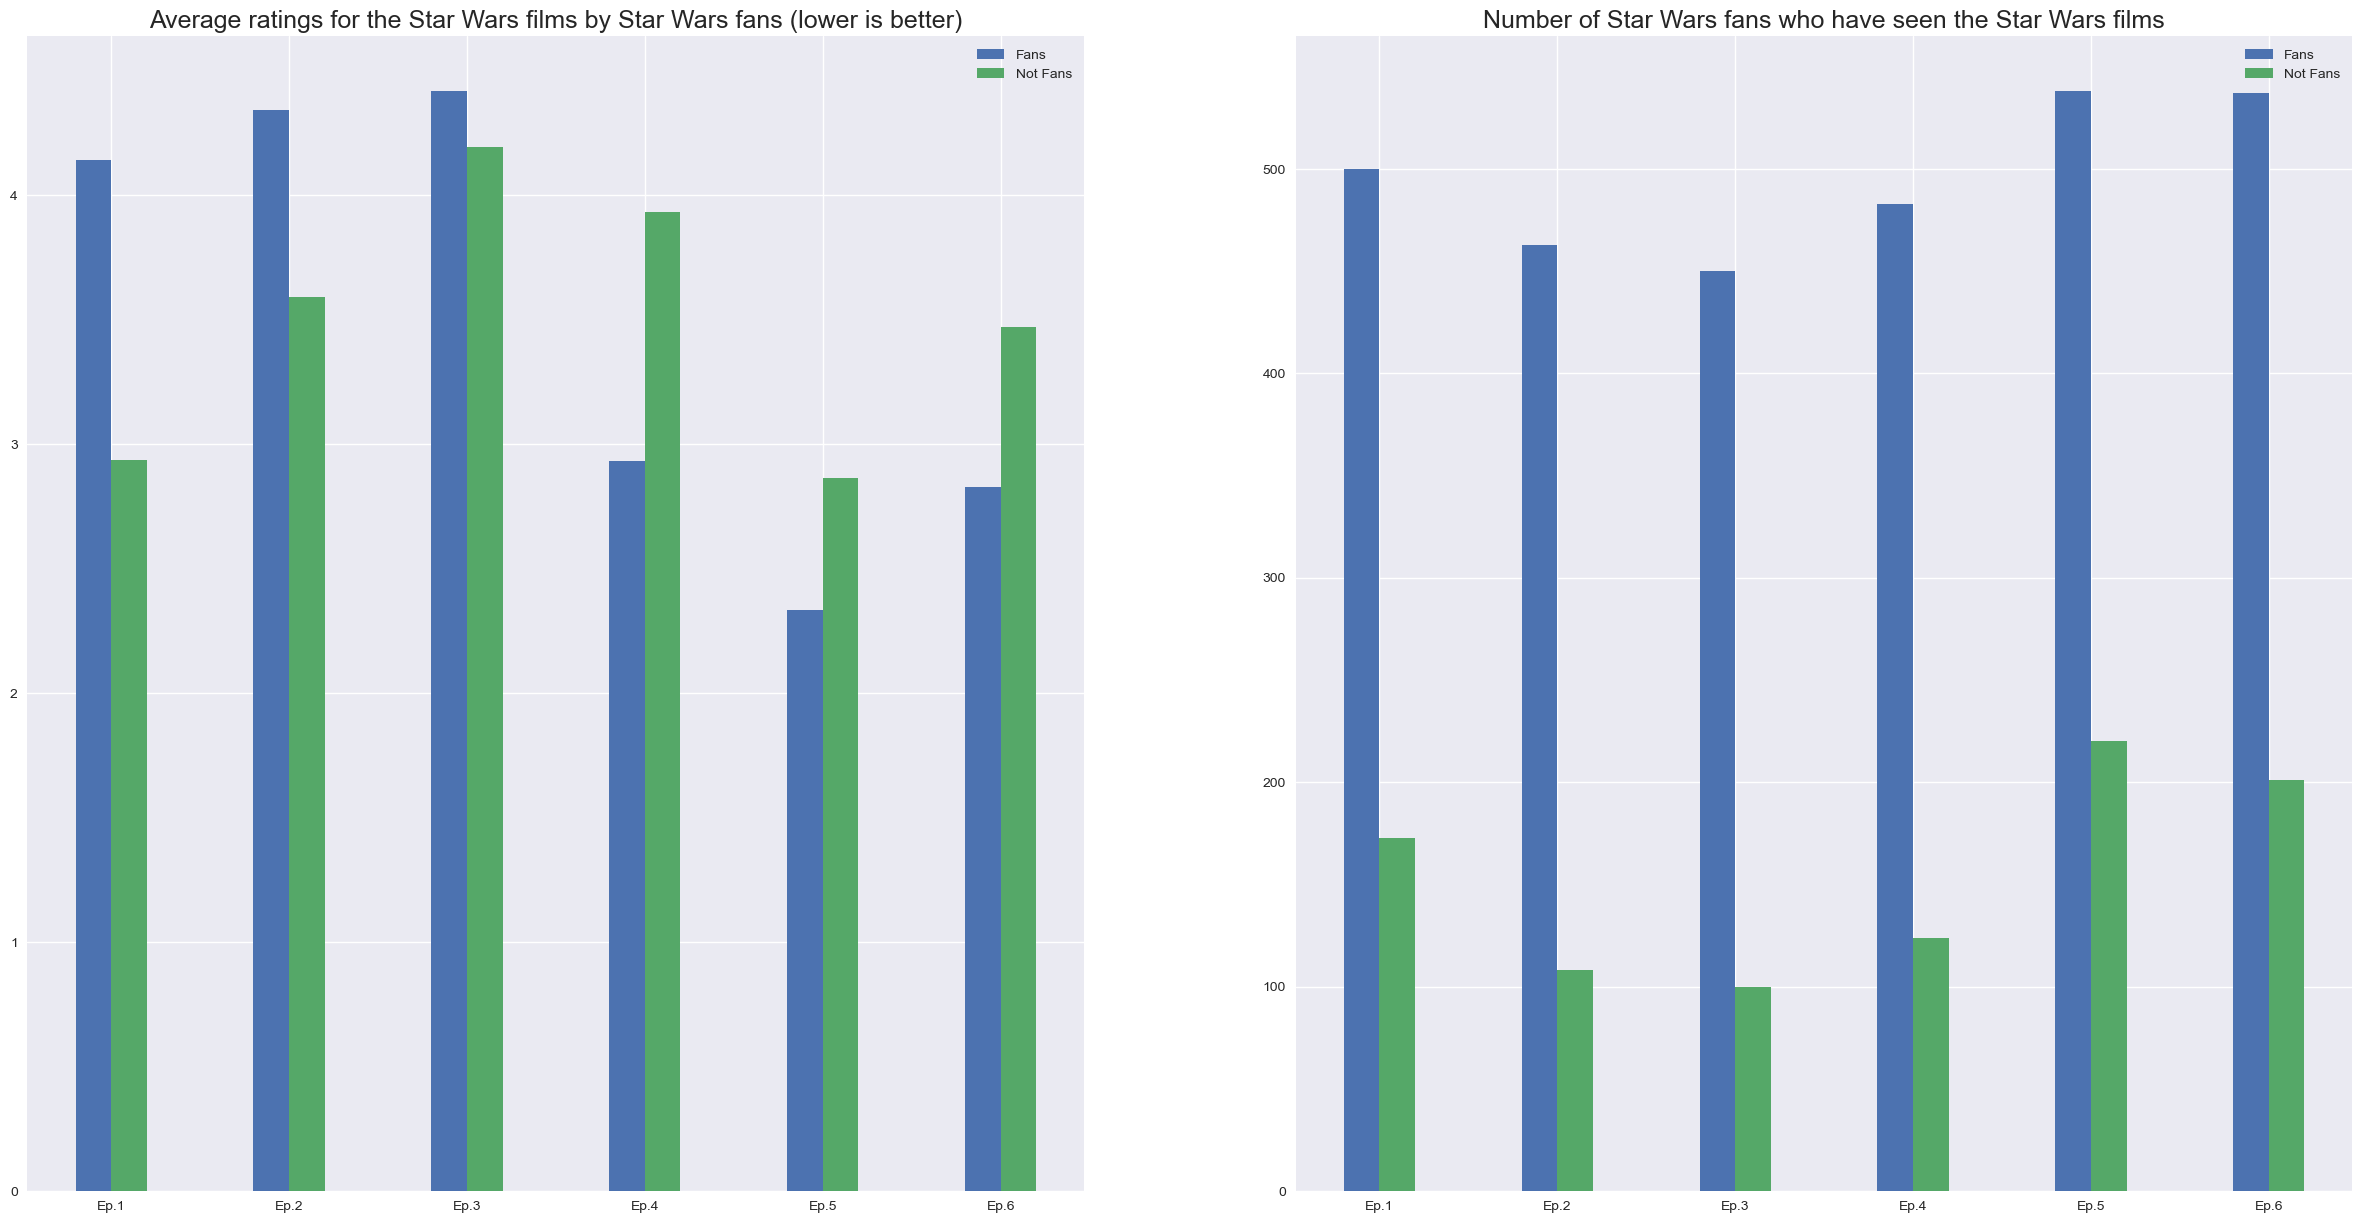

In [12]:
width = 0.20 #width of the bars
lab_len = np.arange(len(labels)) #location of the labels

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(30,15))
ax1.bar(lab_len - width/2, height = sw_fans_mean, width=width, label = 'Fans')
ax1.bar(lab_len + width/2, height = sw_notfans_mean, width=width, label = 'Not Fans')
ax2.bar(lab_len - width/2, height = sw_fans_sum, width=width, label = 'Fans')
ax2.bar(lab_len + width/2, height = sw_notfans_sum, width=width, label = 'Not Fans')
ax1.set_title('Average ratings for the Star Wars films by Star Wars fans (lower is better)', fontsize=18)
ax2.set_title('Number of Star Wars fans who have seen the Star Wars films', fontsize=18)
ax1.set_xticks(lab_len, labels), ax2.set_xticks(lab_len, labels)
ax1.legend(), ax2.legend()
plt.show()

## 2.3 Rating by education level
The `Education` column lists the education level of the respondents. Let's break down the ratings according by this column.

In [13]:
#List of the unique values in the column
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [14]:
#What group has the greatest percentage of viewers?
edu_df = pd.DataFrame()

#High school percentages
high_school = star_wars[star_wars['Education'] == 'High school degree']
edu_df['high_school_per'] = (high_school.iloc[:, 3:9].sum()/len(high_school))*100

#Graduate Degree
graduate = star_wars[star_wars['Education'] == 'Graduate degree']
edu_df['graduate_per'] = (graduate.iloc[:, 3:9].sum()/len(graduate))*100

#Bachelor Degree
bachelor = star_wars[star_wars['Education'] == 'Bachelor degree']
edu_df['bachelor_per'] = (bachelor.iloc[:, 3:9].sum()/len(bachelor))*100

#Some college or associate degree
college = star_wars[star_wars['Education'] == 'Some college or Associate degree']
edu_df['college_per'] = (college.iloc[:, 3:9].sum()/len(college))*100

edu_df['episode'] = labels

edu_df

,high_school_per,graduate_per,bachelor_per,college_per,episode
seen_e1,54.285714,65.090909,64.174455,64.329268,Ep.1
seen_e2,45.714286,54.181818,52.959502,56.707317,Ep.2
seen_e3,45.714286,50.545455,50.778816,55.792683,Ep.3
seen_e4,50.476190,59.272727,60.747664,54.878049,Ep.4
seen_e5,58.095238,75.272727,75.700935,69.207317,Ep.5
seen_e6,57.142857,73.090909,72.897196,67.987805,Ep.6


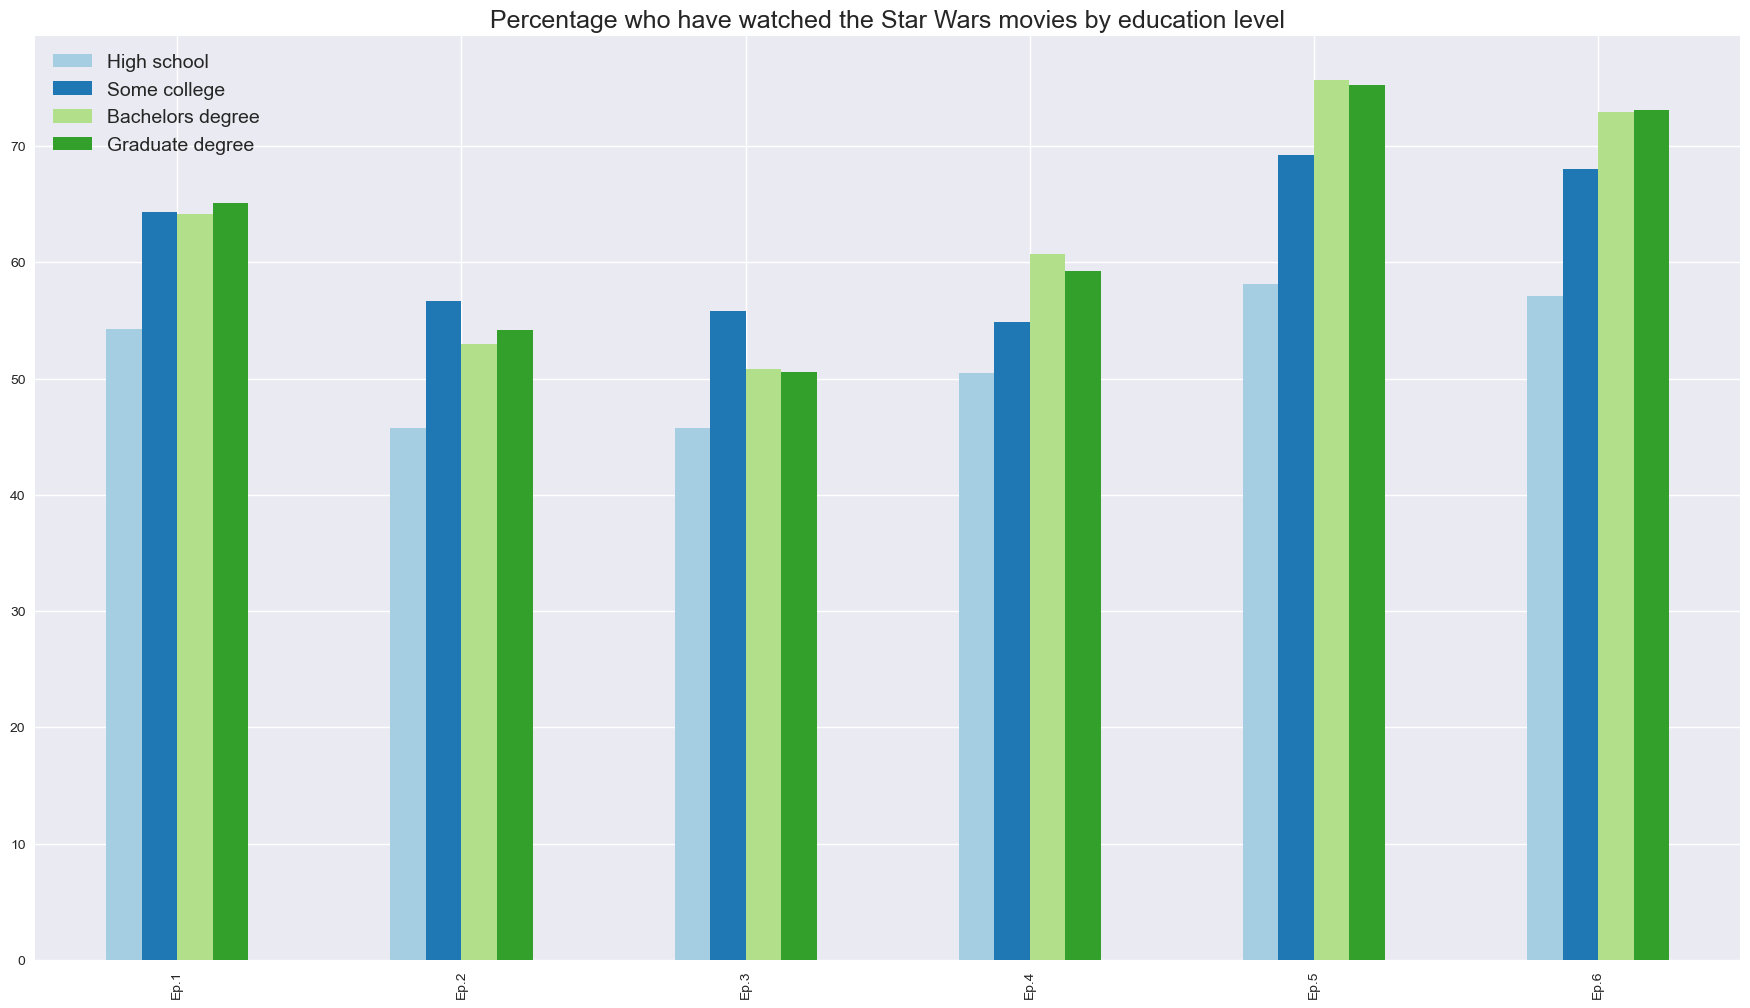

In [15]:
#Plotting viewer percentages for all education levels

fig, ax = plt.subplots(figsize=(22,12))
edu_df.plot(x = 'episode', y = ['high_school_per', 'college_per', 'bachelor_per', 'graduate_per'], kind='bar', ax=ax, color=['#a6cee3','#1f78b4','#b2df8a','#33a02c'])
ax.set_title('Percentage who have watched the Star Wars movies by education level', fontsize=18)
ax.legend(['High school', 'Some college', 'Bachelors degree', 'Graduate degree'], fontsize=14)
ax.set_xlabel('')
plt.show()

In [16]:
#Rating by education level

edu_rate = pd.DataFrame()

#High school ratings
edu_rate['high_school_rate'] = high_school.iloc[:, 9:15].mean()

#Graduate Degree ratings
edu_rate['graduate_rate'] = graduate.iloc[:, 9:15].mean()

#Bachelor Degree ratings
edu_rate['bachelor_rate'] = bachelor.iloc[:, 9:15].mean()

#Some college or associate degree ratings
edu_rate['college_rate'] = college.iloc[:, 9:15].mean()

edu_rate['episode'] = labels

edu_rate

,high_school_rate,graduate_rate,bachelor_rate,college_rate,episode
rating_e1,3.802817,3.822222,3.828244,3.551181,Ep.1
rating_e2,3.746479,4.225664,4.290076,3.885827,Ep.2
rating_e3,4.126761,4.500000,4.521073,4.102362,Ep.3
rating_e4,3.211268,3.199115,3.114504,3.503937,Ep.4
rating_e5,2.873239,2.323009,2.309160,2.783465,Ep.5
rating_e6,3.239437,2.920354,2.931298,3.173228,Ep.6


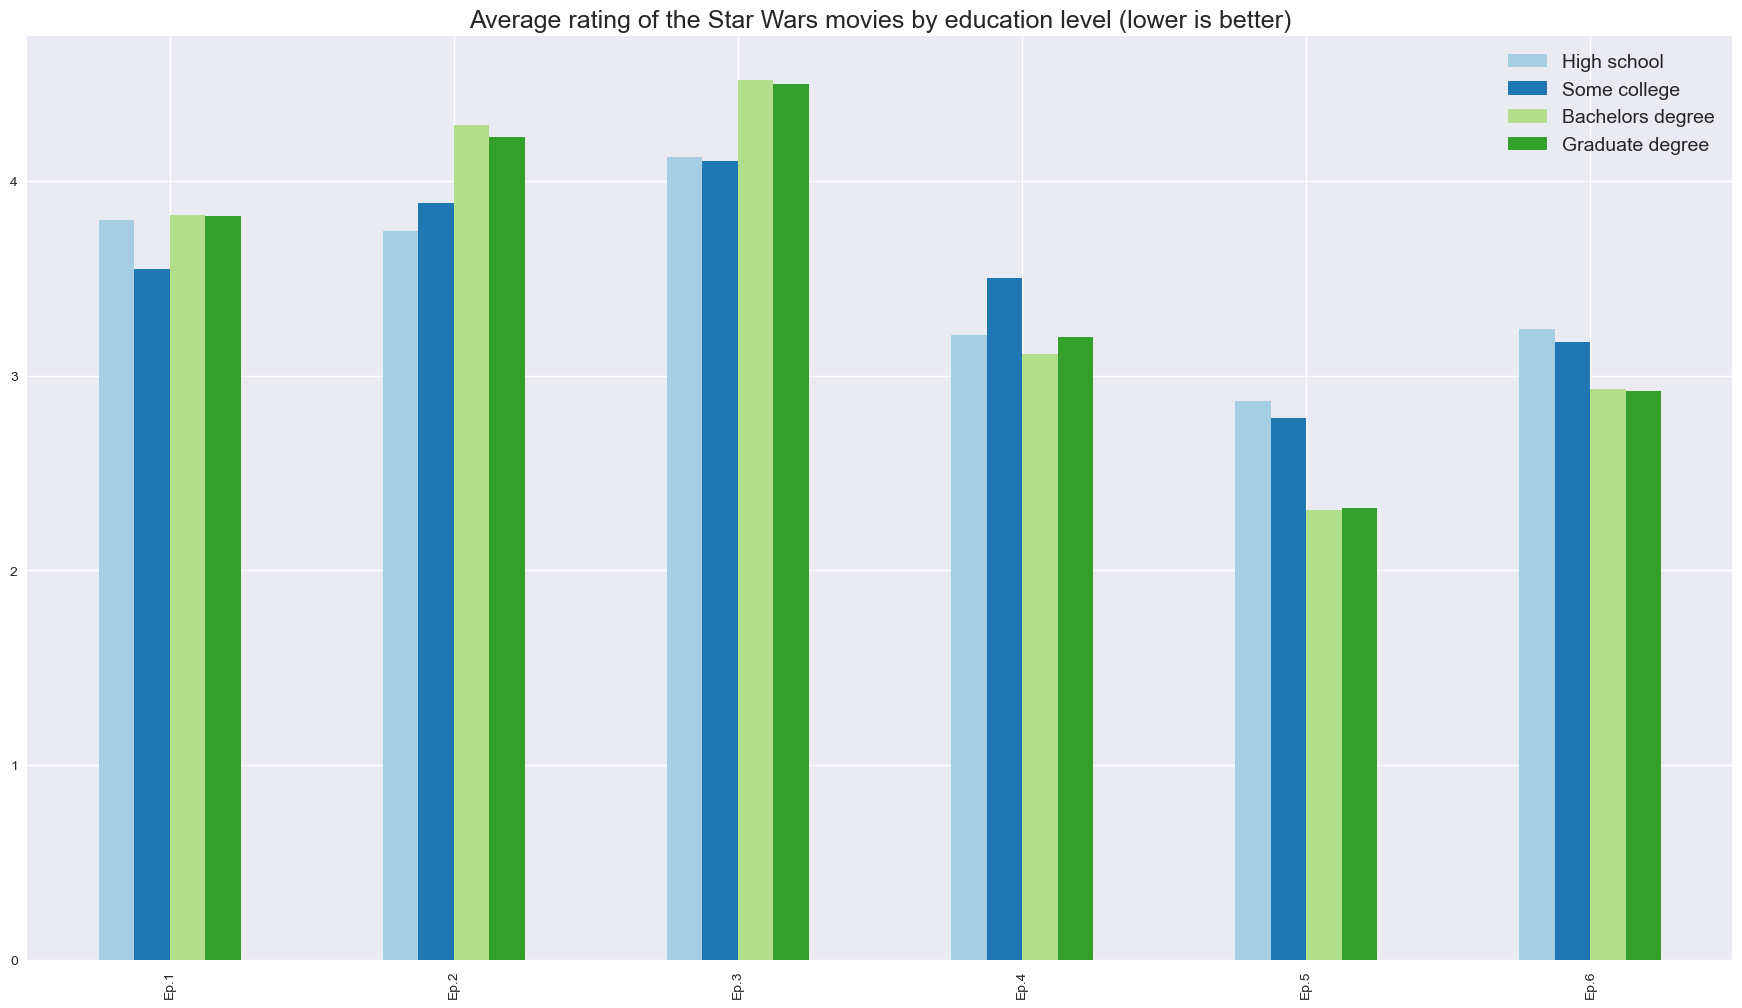

In [17]:
#Plotting average ratings for all education levels

fig, ax = plt.subplots(figsize=(22,12))
edu_rate.plot(x = 'episode', y = ['high_school_rate', 'college_rate', 'bachelor_rate', 'graduate_rate'], kind='bar', ax=ax, color=['#a6cee3','#1f78b4','#b2df8a','#33a02c'])
ax.set_title('Average rating of the Star Wars movies by education level (lower is better)', fontsize=18)
ax.legend(['High school', 'Some college', 'Bachelors degree', 'Graduate degree'], fontsize=14)
ax.set_xlabel('')
plt.show()

# Conclusion
To the answer the question stated in the introduction: `Star Wars: Episode V The Empire Strikes Back` is, in fact, the highest-rated and most viewed of the Star Wars films.
Some other observations:
- Overall, the original trilogy is rated higher and has been more viewed than the prequel trilogy among all the groups investigated(education level, fans vs non-fans, gender).
- There is a slight difference in ratings between the genders with women rating the original trilogy slightly more unfavorably. Significantly more men than women have watched the Star Wars movies.
- Star Wars fans rate the original trilogy higher than non-fans and the prequel trilogy poorer. Far more fans have seen the movies than non-fans.
- Those with higher education are more likely to have seen the original trilogy, but this is only somewhat true for the prequel trilogy. They also rate the original trilogy higher than the prequel trilogy.
